In [22]:
import pandas as pd

data = pd.read_csv('Boston.csv')

data.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT -  Lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

### Have a glance at the dependent and independent variables

In [23]:
data_ = data.loc[:,['lstat','medv']]
data_.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


### Visualize the data

<function matplotlib.pyplot.show(*args, **kw)>

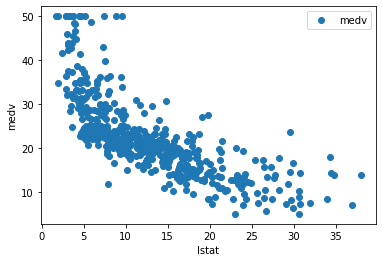

In [24]:
import matplotlib.pyplot as plt

data.plot(x = 'lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show

### Creat dataframe as independent and dependent variables..

In [25]:
x = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])


### Split the dataset to train and test sets...

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# print data shapes...
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', y_test.shape)


x_train shape :  (404, 1)
x_test shape :  (102, 1)
y_train shape :  (404, 1)
X_test shape :  (102, 1)


### Define the model....

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Retrieve the intercept..

In [15]:
print(regressor.intercept_)

[34.33497839]


### Retrieve the slope

In [16]:
print(regressor.coef_)

[[-0.92441715]]


### Test and visualize the prediction

In [18]:
y_pred = regressor.predict(x_test)

print(y_pred)

[[27.37411725]
 [27.69766325]
 [16.95593597]
 [26.84719947]
 [24.91516763]
 [24.05545968]
 [29.99021779]
 [22.28057875]
 [17.76942306]
 [26.1908633 ]
 [27.17998965]
 [30.07341533]
 [21.75366098]
 [24.86894677]
 [23.50080939]
 [23.12179836]
 [12.85152382]
 [30.05492699]
 [27.46655897]
 [ 7.03693995]
 [23.70418116]
 [18.94343284]
 [25.75638724]
 [28.67754543]
 [30.0179503 ]
 [11.7884441 ]
 [15.53233356]
 [24.6008658 ]
 [27.62370988]
 [15.06088081]
 [29.25992824]
 [17.2702378 ]
 [31.672657  ]
 [19.13756044]
 [25.9320265 ]
 [21.77214932]
 [17.88959729]
 [29.40783498]
 [12.75908211]
 [20.48720948]
 [27.54975651]
 [28.09516263]
 [27.30940805]
 [12.05652507]
 [17.66773717]
 [13.3137324 ]
 [32.56009746]
 [19.22075799]
 [25.26644615]
 [24.50842409]
 [23.55627442]
 [23.96301797]
 [29.51876504]
 [24.07394802]
 [ 6.89827738]
 [28.11365097]
 [ 6.6301964 ]
 [28.80696383]
 [20.7737788 ]
 [30.68353065]
 [20.4502328 ]
 [28.2985344 ]
 [15.92058876]
 [18.02825986]
 [ 7.01845161]
 [29.67591595]
 [32.05166

### Visualize the actual data...

In [19]:
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


### Evaluate with different metrics

In [21]:
from sklearn import metrics
import numpy as np

print('Mean Absulute Error (MAE) :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE) :',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absulute Error (MAE) : 5.078127727696937
Mean Squared Error (MSE) : 46.994820919547124
Root Mean Squared Error (RMSE) : 6.855276866731724
